### 1. Скачать данные по ссылке https://drive.google.com/file/d/1MpAdHAl727fO3oW32NO4FpSRhUBUfjfS
Считать данные с помощью pandas
Вывести на экран первые 5 строк
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("laptop_price.csv", sep=',', encoding='windows-1251')
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69


In [24]:
df['Memory_Amount'] = df['Memory'].apply(lambda x : x.split(" ")[0])
df['Memory_Type'] = df['Memory'].apply(lambda x : x.split(" ")[1])

### 1.1 Изучите количество памяти с помощью matplotlib

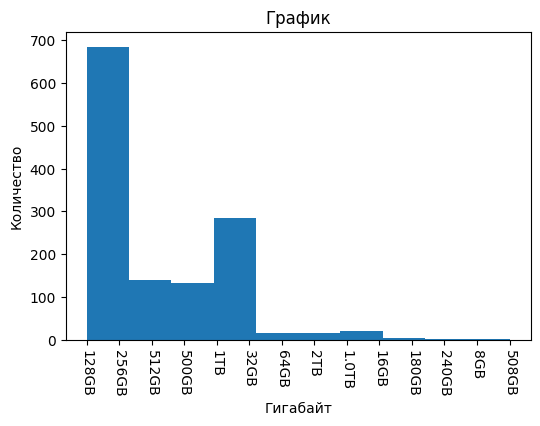

In [21]:
plt.figure(figsize=(6, 4))
plt.hist(df['Memory_Amount'])
plt.title("График")
plt.xlabel("Гигабайт")
plt.ylabel("Количество")
plt.xticks(rotation=-90);

### 1.2 Изучите стоимость ноутбуков с помощью matplotlib

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.]),
 [Text(-1000.0, 0, '−1000'),
  Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000'),
  Text(7000.0, 0, '7000')])

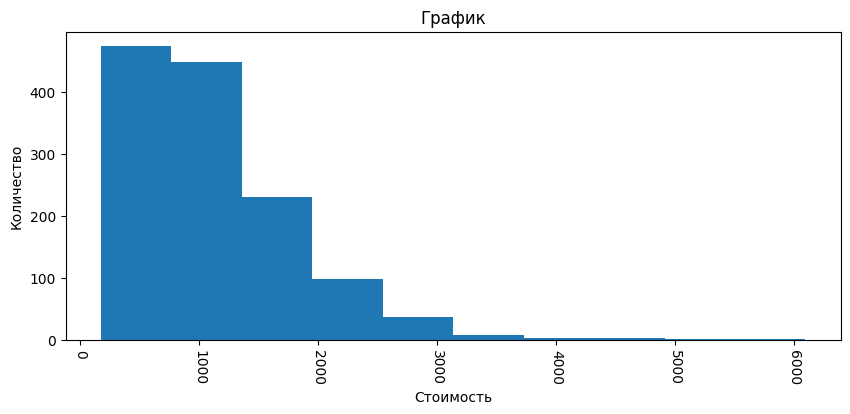

In [14]:
plt.figure(figsize=(10, 4))
plt.hist(df['Price_euros'])
plt.title("График")
plt.xlabel("Стоимость")
plt.ylabel("Количество")
plt.xticks(rotation=-90);

### 1.3 Изучите вес ноутбуков с помощью matplotlib

In [17]:
df['Weight'] = df['Weight'].str.replace("kg", "")
df['Weight'].astype(float)

0       1.37
1       1.34
2       1.86
3       1.83
4       1.37
        ... 
1298    1.80
1299    1.30
1300    1.50
1301    2.19
1302    2.20
Name: Weight, Length: 1303, dtype: float64

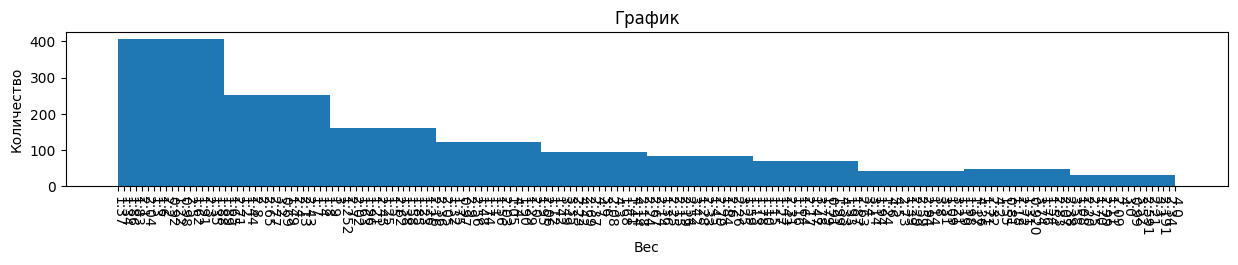

In [23]:
plt.figure(figsize=(15, 2))
plt.hist(df['Weight'])
plt.title("График")
plt.xlabel("Вес")
plt.ylabel("Количество")
plt.xticks(rotation=-90);

## Задание 2

### 2.1 Изучите распределение типов носителя

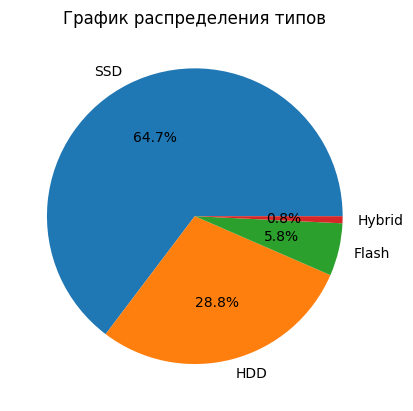

In [31]:
data = df['Memory_Type'].value_counts()
plt.pie(data.values, autopct='%1.1f%%', labels=data.index)
plt.title("График распределения типов")
plt.xticks(rotation=-90);

### 2.2 Изучите распределение компаний производителей

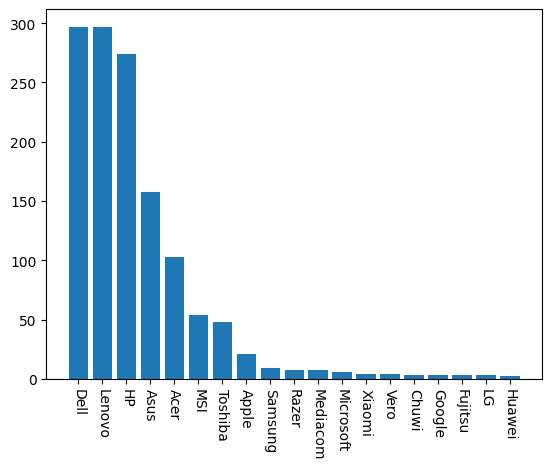

In [37]:
data = df['Company'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=-90);

### 2.3 Изучите распределение операционной системы

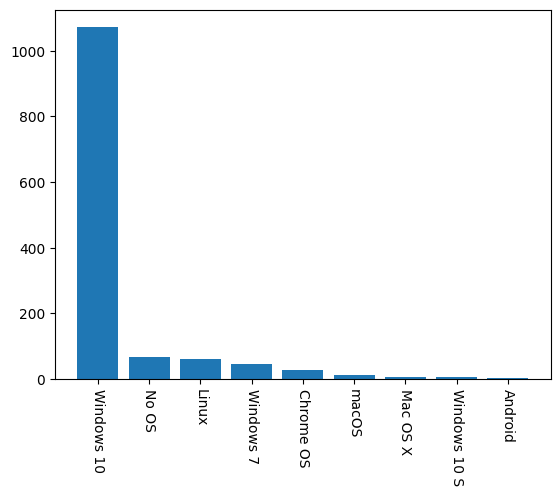

In [39]:
data = df['OpSys'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=-90);

### 2.4 Изучите распределение компаний производителей CPU

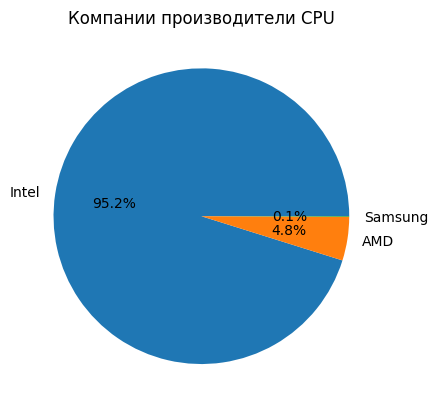

In [40]:
df['Cpu_Company'] = df['Cpu'].apply(lambda x : x.split(" ")[0])
data = df['Cpu_Company'].value_counts()
plt.pie(data.values, autopct='%1.1f%%', labels=data.index)
plt.title("Компании производители CPU")
plt.xticks(rotation=-90);


## Задание 3
Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
Процессоры от Samsung не изучайте

### 3.1 Постройте график в абсолютных величинах
### 3.2 Постройте график в относительных величинах

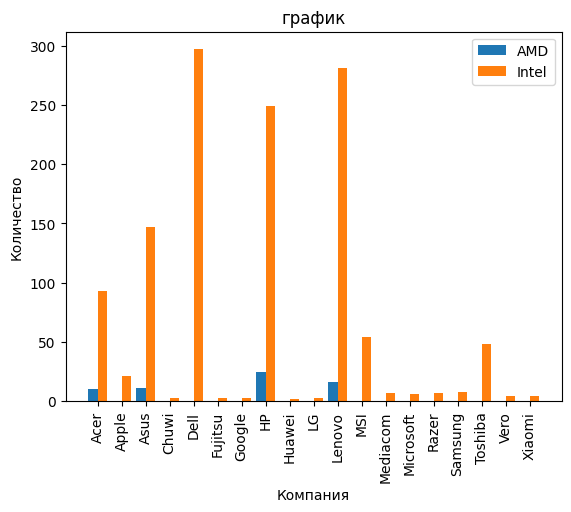

In [53]:
data = pd.crosstab(df['Company'], df['Cpu_Company'])
data = data.drop(columns=['Samsung']).reset_index()
n_ticks = np.arange(len(data['AMD']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data['AMD'], width=w)
plt.bar(n_ticks + offset, data['Intel'], width=w)
plt.title('график')
plt.xlabel('Компания')
plt.ylabel('Количество')
plt.legend(['AMD', 'Intel'])
plt.xticks(n_ticks, data['Company'], rotation=90);